### Neural Network Classification problems

Difference between multi class classification and multi label classification -check ChatGPT

### To be done:
1. Architecture of a neural network ***Classification*** model
2. Input shapes and output shapes of a Classification model (features and labels)
3. Creating custom data to view and fit
4. Steps in modeling -

  4.1. Creating a model

  4.2. Compiling a model

  4.3. Fitting a model

  4.4. Evaluating a model

5. Different evaluation methods
6. Saving and loading models

#### Classification inputs and outputs :

[batch_size, width, height, color_channels] if dealing with image inputs

Shape = [None,224,224,3] or [32, 224, 224, 3]

32 is a very common batch size.

Outputs can be predictions -

Shape = [3] if there were only 3 labels to be predicted (that means the image can be either one of the 3 labels and the output would be the probability values of that image being belonging to that class or label)

*these inputs and outputs depends on lot of other factors such as the dimensions of the input, and the number of classes (binary classification or multiple class classification) etc.*

Binary classification would have 1 as output [yes or no] - output layer shape.



## Introduction to neural network classification with TensorFlow

Writing neural networks for classification .

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples=1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)



In [2]:
# Checking out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Checking the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Visualizing the data to better understand the data create by make_circles

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y}) # 2 features per label
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


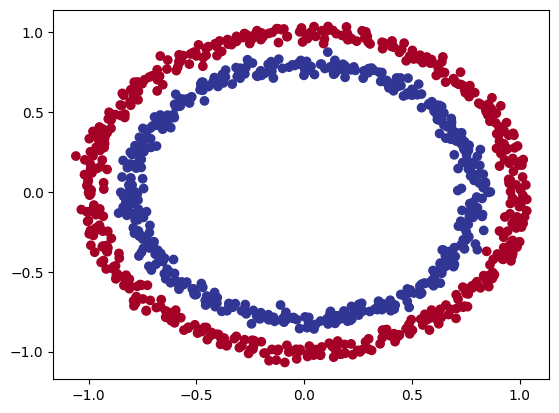

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

### Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Viewing the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate the model...


In [8]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.0548 - accuracy: 0.4580
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4870


In [9]:
# Improving the model by training for longer
model_1.fit(X,y, epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since working on a binary classification problem with the model accuracy being around 50%. Improving the model by making it more complex - adding more layers in an improved model.

In [10]:
# Adding another layer

# Setting the random seed
tf.random.set_seed(42)

# 1. Create a model, with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100, verbose=0)

In [11]:
# 4. Evaluate the new model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933391094207764, 0.5]

### Improving the model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)



In [13]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5100


[0.7011347413063049, 0.5099999904632568]

Io visualize our model's predictions, let's create a function plot _decision_boundary()', this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class

In [14]:
import numpy as np

def plot_decision_boundary(model, X,y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max =X[:, 0 ].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max() + 0.1
  #print(x_min,x_max, y_min,y_max)
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X values (to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] #stacks 2D arrays together

  #Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-glass
  if len(y_pred[0])>1:
    print("doing multi class classification")
    #have to reshape our predictions to plot
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0],X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




In [15]:
x_min, x_max =X[:, 0 ].min() -0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max() + 0.1
print(x_min,x_max, y_min,y_max)

-1.1595024599098636 1.1337117525463374 -1.1677683182718437 1.1360036756154805


313/313 [==============================] - 1s 1ms/step
doing binary classification


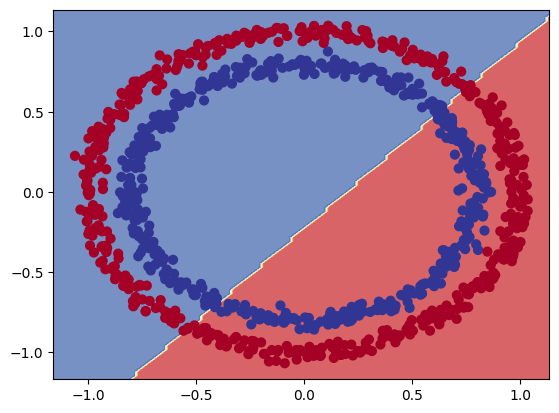

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

### Dealing with Non Linearity

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5537 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5130 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4819 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3686 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3515 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3549 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3309 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2670 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1284 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9197 - accuracy: 0.4750
Epoch 11/

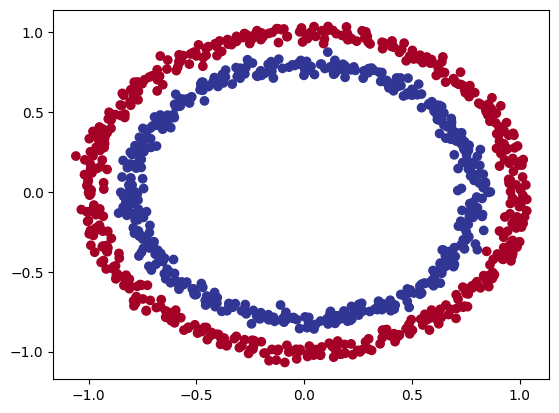

In [18]:
# Visualize
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


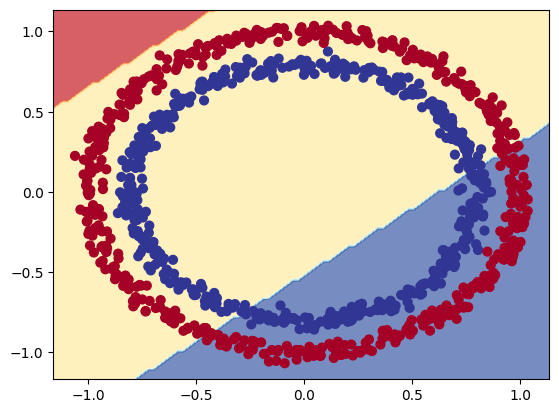

In [19]:
# Check the decision boundary for model 4
plot_decision_boundary(model=model_4, X= X, y=y)

### Building a neural network with non linear activation hyperparameter

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non linear activation
model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1) #output layer
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.9177 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5005 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3811 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2978 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2328 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1789 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1349 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0634 - accuracy: 0.4390
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0330 - accuracy: 0.4160
Epoch 11/

In [21]:
# Building another model with more number of non linear activation layers and output layer with a sigmoid activation function

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 6 with more number of Dense layers and sigmoid activation output layer
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid) #output layer for binary classification
])

# 2. Compiling the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,y,epochs=100,verbose=0)

In [22]:
# 4. Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 1.0000


[0.054132696241140366, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


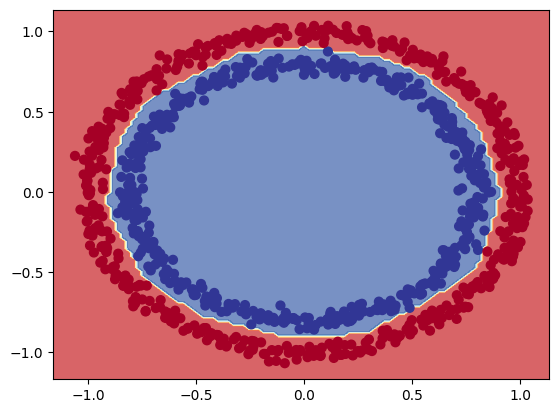

In [23]:
# Visualizing
plot_decision_boundary(model_6,X,y)

#### Looks good but we aren't evaluating the model properly because we evaluated the model on training data instead of test data, so the model is only being tested on data it has seen before instead of unseen data.

Overfitting - Testing the model on unseen data may yield different accuracy results.

### Linearity into Non Linearity

Here comes the sigmoid function

In [24]:
# Making a toy tensor A
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

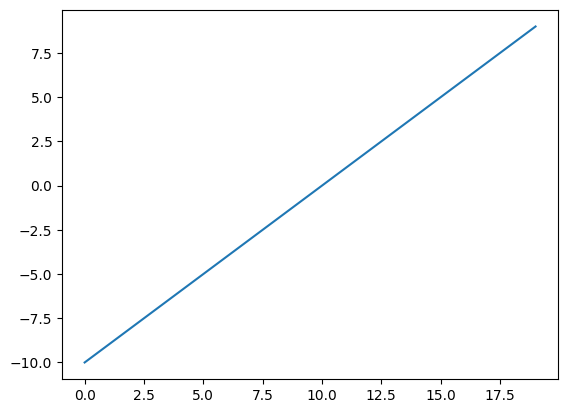

In [25]:
# Visualizing the toy tensor
plt.plot(A);

In [26]:
# Coding the sigmoid function
def sigmoid(x):
  return 1 /(1+ tf.exp(-x))

#using the sigmoid function in the toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

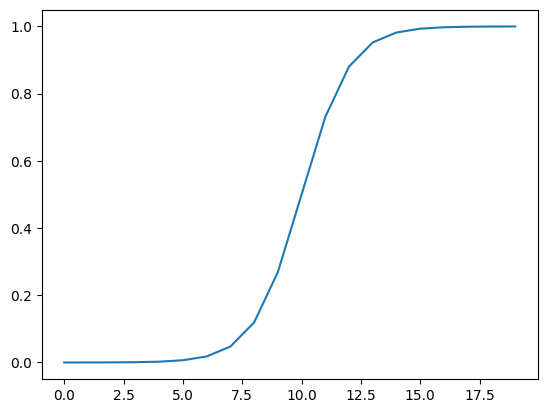

In [27]:
# Visualizing the sigmoid output
plt.plot(sigmoid(A));

In [28]:
# Recreating relu function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

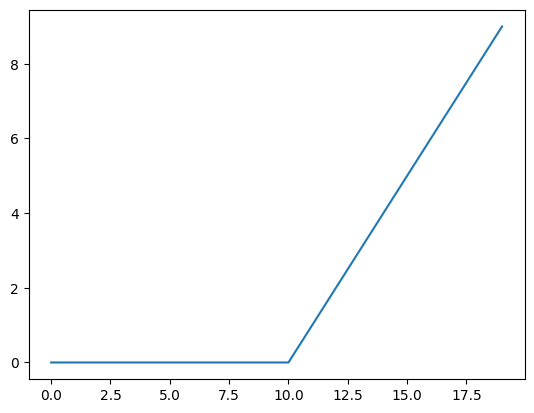

In [29]:
# Visualizing the relu function
plt.plot(relu(A));

### Improving model's working and then evaluating

So far we have been training and testing the model on the same training data, which is basically a sin in machine learning.

Now we will be dividing our data into training and testing datasets and evaluating our model on the testing dataset after training the model on the training dataset to know how it performs on unseen data and how accurate our model really is?

In [30]:
# Splitting into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [31]:
# Recreating the model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),  #changing the learning rate to see if it improves faster
                metrics=["accuracy"])

# 3. Fit the model on the training set
history = model_7.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.4938
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5050
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5225
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5350
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5362
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5312
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5337
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5325
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5650
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5713
Epoch 11/50
25/25 [

In [32]:
# 4. Evaluating the model on the test set
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.9950


[0.31457194685935974, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


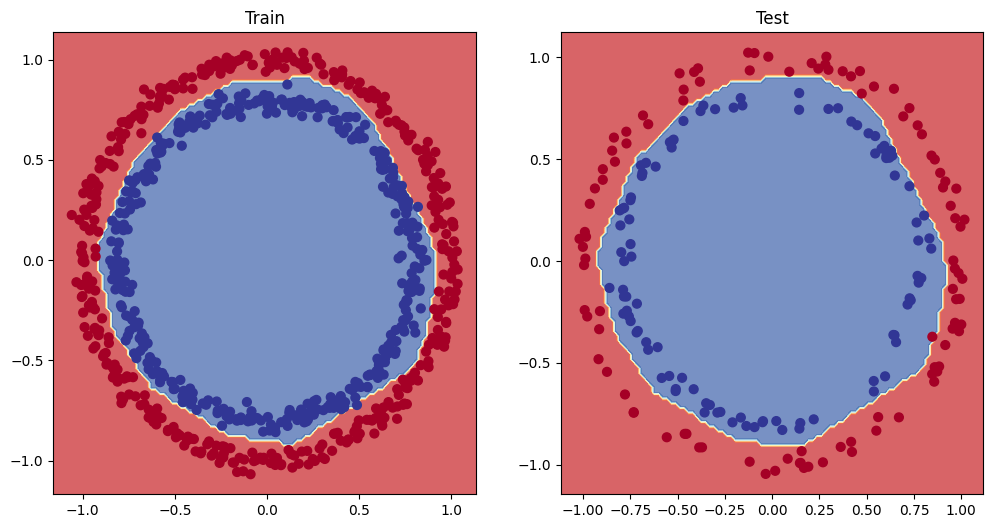

In [33]:
# Visualizing the decision boundary for the training and the test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7,X= X_test, y= y_test)

### Plotting the loss (training) curve

In [34]:
# Converting the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692420,0.49375
1,0.690914,0.50500
2,0.689650,0.52250
3,0.688350,0.53500
4,0.687292,0.53625
5,0.686012,0.53125
6,0.684414,0.53375
7,0.683391,0.53250
8,0.681778,0.56500
9,0.680318,0.57125


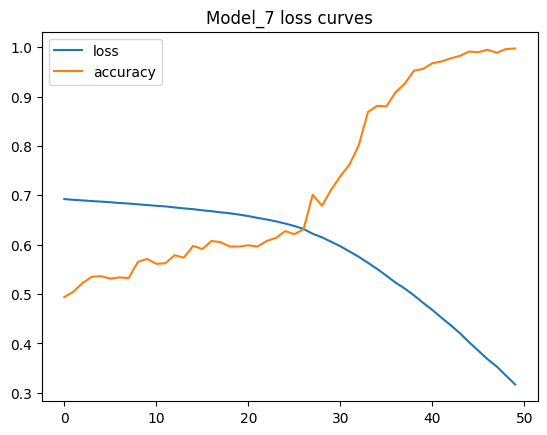

In [35]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves");

#### For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels) .|

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss drecreases the most during training) going to use the following steps:
* A learning rate callback - an extra piece of functionality to the model while its training.
* Another model (could use the same one)
* A modified loss curve plot.


In [36]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model 7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit the model (passing the lr_scheduler callback)
history = model_8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

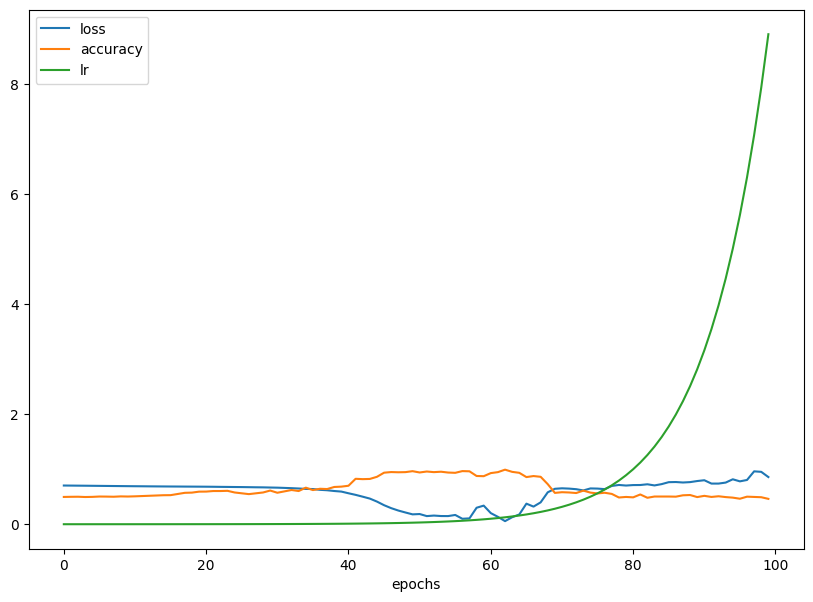

In [37]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [38]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

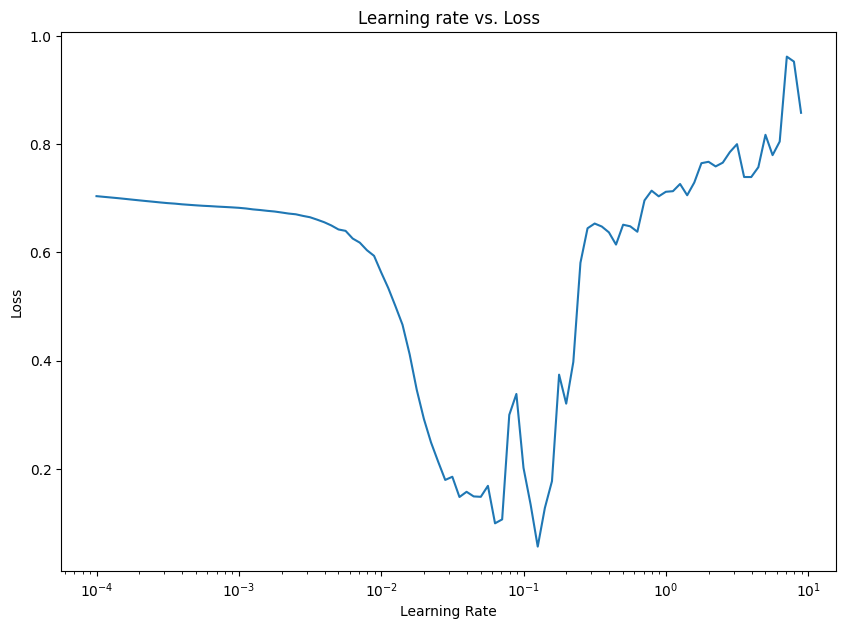

In [39]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history ["loss"] )
plt.xlabel ("Learning Rate" )
plt.ylabel ("Loss" )
plt. title( "Learning rate vs. Loss");

In [40]:
# Trying with a higher ideal learning rate with same model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.03), #according to the graph, loss is minimum in that region for my model
                metrics=["accuracy"])

# Fit the model for 20 epochs
history = model_9.fit(X_train,y_train,epochs=80)

Epoch 1/80
25/25 [==============================] - 1s 6ms/step - loss: 0.6909 - accuracy: 0.4950
Epoch 2/80
25/25 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.5063
Epoch 3/80
25/25 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5088
Epoch 4/80
25/25 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.5163
Epoch 5/80
25/25 [==============================] - 0s 8ms/step - loss: 0.6864 - accuracy: 0.5113
Epoch 6/80
25/25 [==============================] - 0s 7ms/step - loss: 0.6858 - accuracy: 0.5150
Epoch 7/80
25/25 [==============================] - 0s 9ms/step - loss: 0.6852 - accuracy: 0.5150
Epoch 8/80
25/25 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5125
Epoch 9/80
25/25 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.5213
Epoch 10/80
25/25 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5213
Epoch 11/80
25/25 [

### Exercises and co curriculum part from Classification using Neural Networks

In [41]:
# Task 1 : Regenerate the picture as a TensorFlow model

#Generating classification based data
from sklearn.datasets import make_circles
# Make 100 examples
n_samples=1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [42]:
# Visualizing the data
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [43]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [44]:
import pandas as pd
circle = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circle

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


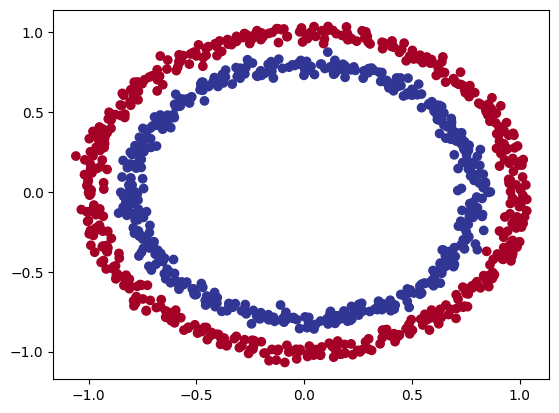

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [46]:
# Splitting into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
# 1. Create the model
model_task1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid") #since the number of classes in the label is either a 0 or 1 : binary classification
])

# 2. Compiling the model
model_task1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# 3.  Fitting the model
history_task1= model_task1.fit(X_train,y_train,epochs=100,verbose=0)

In [48]:
# Checking the model arhcitecture
model_task1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (32, 6)                   18        
                                                                 
 dense_22 (Dense)            (32, 6)                   42        
                                                                 
 dense_23 (Dense)            (32, 6)                   42        
                                                                 
 dense_24 (Dense)            (32, 6)                   42        
                                                                 
 dense_25 (Dense)            (32, 6)                   42        
                                                                 
 dense_26 (Dense)            (32, 1)                   7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 

<Axes: title={'center': 'loss vs epochs'}, xlabel='epochs', ylabel='loss'>

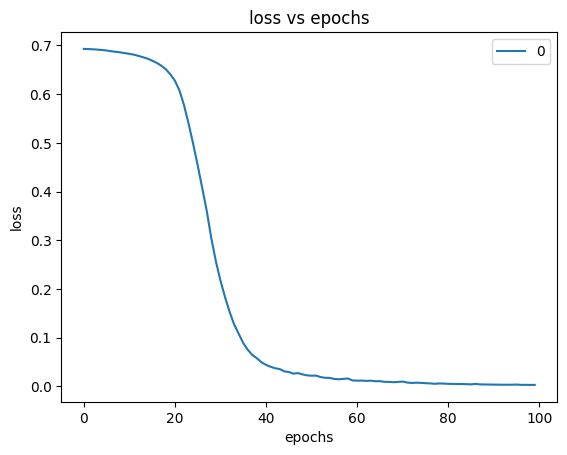

In [49]:
# Plotting the training loss curves vs epochs
pd.DataFrame(history_task1.history["loss"]).plot(xlabel="epochs",ylabel="loss",title="loss vs epochs")

<Axes: title={'center': 'accuracy vs epochs'}, xlabel='epochs', ylabel='accuracy'>

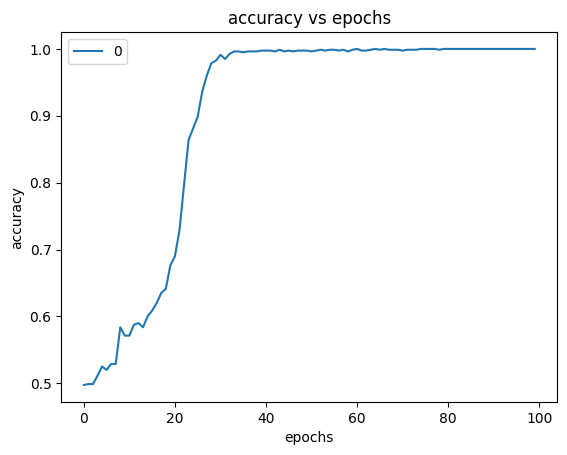

In [50]:
# Plotting the training accuracy curve
pd.DataFrame(history_task1.history["accuracy"]).plot(xlabel="epochs",ylabel="accuracy",title="accuracy vs epochs")

In [51]:
# Evaluating the model
model_task1.evaluate(X_test,y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.0105 - accuracy: 0.9950


[0.010475755669176579, 0.9950000047683716]

313/313 [==============================] - 2s 5ms/step
doing binary classification
313/313 [==============================] - 2s 5ms/step
doing binary classification


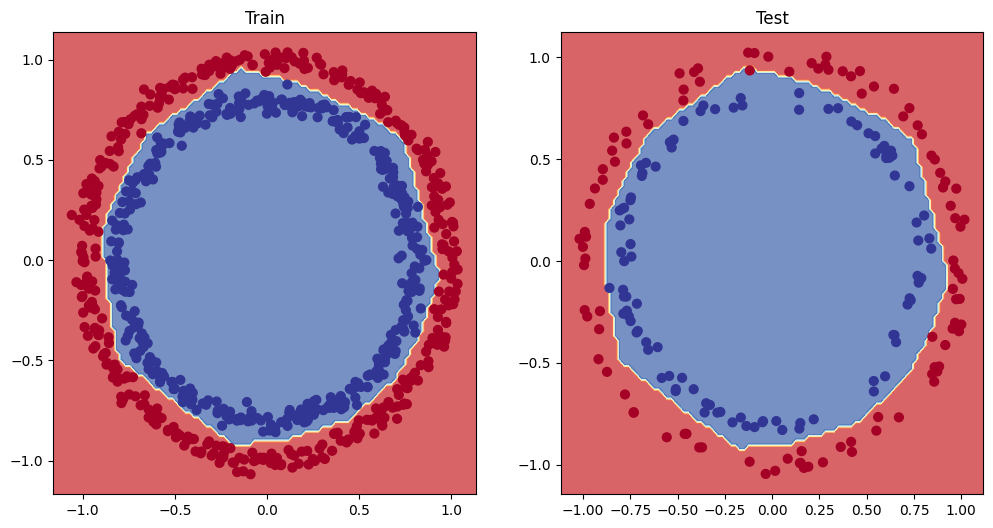

In [52]:
# Visualizing the decision boundary for the training and the test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_task1,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_task1,X= X_test, y= y_test)

In [53]:
# Task 2 : make_moons dataset ; achieve over 85% accuracy on it

#Generating classification based data
from sklearn.datasets import make_moons
# Make 100 examples
n_samples=1000

# Create circles
X,y = make_moons(n_samples,
                   noise=0.03,
                   random_state=42)

In [54]:
# Visualizing the data
X[0],y[0]

(array([-0.00933187,  0.39098105]), 1)

In [55]:
# Converting the data into a dataframe
moon=pd.DataFrame({"Feature 1":X[:,0],"Feature 2":X[:,1],"Label":y})
moon

,Feature 1,Feature 2,Label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


In [56]:
# Splitting the data into Train and Test sets
X_train, X_test = X[:800], X[200:]
y_train, y_test = y[:800], y[200:]


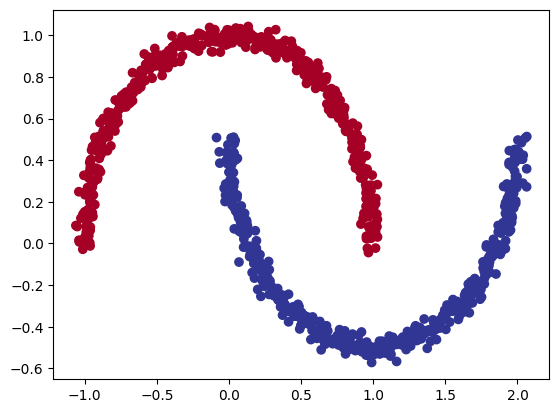

In [57]:
# Plotting the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [58]:
# Creating the model
model_task2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid") #Binary classification since label is either 0 or 1
])

# Compiling the model
model_task2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fitting the model
history_task2 = model_task2.fit(X_train,y_train,epochs=50, verbose=0)

In [59]:
# Checking the model architecture
model_task2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (32, 4)                   12        
                                                                 
 dense_28 (Dense)            (32, 4)                   20        
                                                                 
 dense_29 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


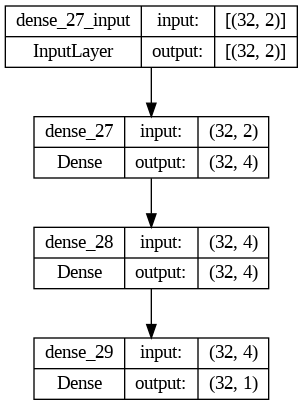

In [65]:
tf.keras.utils.plot_model(model=model_task2,show_shapes=True)

In [66]:
# Evaluating the model
model_task2.evaluate(X_test,y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9350


[0.25879254937171936, 0.9350000023841858]

<Axes: title={'center': 'loss vs epochs'}, xlabel='epochs', ylabel='loss'>

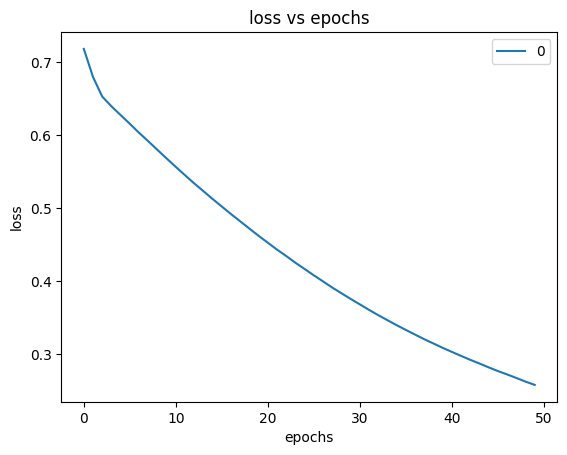

In [67]:
# Plotting the training loss vs epochs curve
import matplotlib.pyplot as plt
pd.DataFrame(history_task2.history["loss"]).plot(xlabel="epochs",ylabel="loss",title="loss vs epochs")


<Axes: title={'center': 'accuracy vs epochs'}, xlabel='epochs', ylabel='accuracy'>

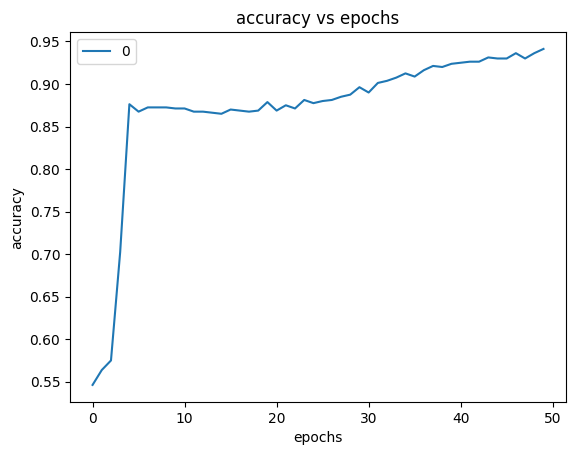

In [68]:
# Plotting the training accuracy vs the epochs curve
pd.DataFrame(history_task2.history["accuracy"]).plot(xlabel="epochs",ylabel="accuracy",title="accuracy vs epochs")

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


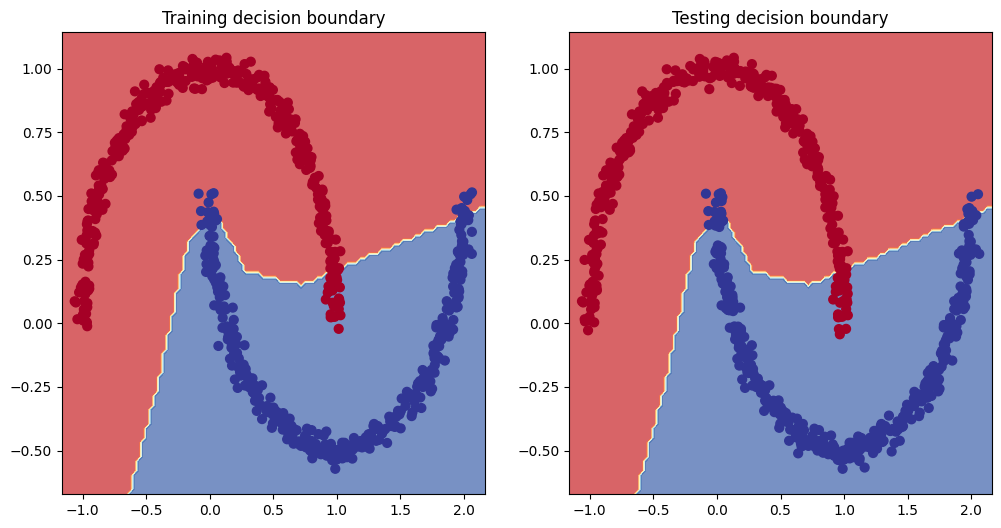

In [70]:
# Plotting the decision boundary for the training data and the testing data
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training decision boundary")
plot_decision_boundary(model=model_task2,X= X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing decision boundary")
plot_decision_boundary(model=model_task2, X= X_test, y= y_test)

In [120]:
# Task 3 : 88% + accuracy on test set on Fashion Mnist dataset
from keras.datasets import fashion_mnist
# load dataset
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [121]:
# Visualizing the data
X_train[:10], y_train[:10]

(array([[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,

In [122]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [123]:
# Normalizing the data
max = X_train.max()
min = X_train.min()
norm_factor = max-min

#X_train_norm[0]

In [124]:
# Creating the model
model_task3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax") #multi class classification problem
])


In [125]:
# Checking the model architecture
model_task3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 300)               235500    
                                                                 
 dense_45 (Dense)            (None, 100)               30100     
                                                                 
 dense_46 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [127]:
# Making the validation set and the test set different to prevent overfitting
X_train_norm = X_train[:50000]/norm_factor
X_val_norm = X_train[50000:]/norm_factor
X_test_norm = X_test/ norm_factor
y_training = y_train[:50000]
y_val = y_train[50000:]


In [128]:
# Printing the shapes
X_train_norm.shape,y_train.shape,X_val_norm.shape, y_val.shape

((50000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [129]:
# Compiling the model
model_task3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

history_task3 = model_task3.fit(X_train_norm,y_training,epochs=40,validation_data=(X_val_norm,y_val),verbose=0)

In [130]:
# Evaluating the model
model_task3.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5744 - accuracy: 0.8901


[0.5743773579597473, 0.8901000022888184]

<Axes: xlabel='epochs'>

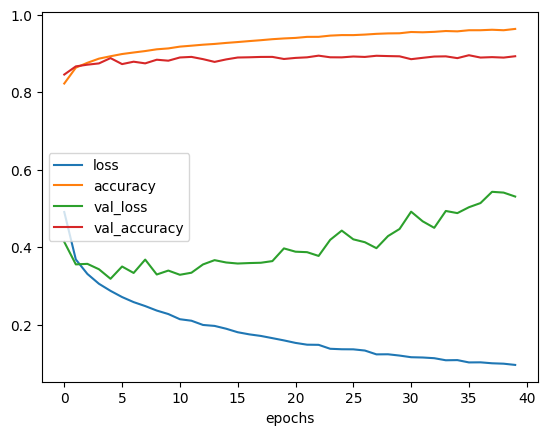

In [131]:
# Plotting the training, validation loss and accuracy curves
pd.DataFrame(history_task3.history).plot(xlabel="epochs")

In [132]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]